In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Part 1:  
-A.) Scalar values of vector_a are not equal therefore it is not an eigenvector  
-B.) Scalar values of vector_b are not equal therefore it is not an eigenvector  
-C.) Calculated all of the eigenvalues and eigenvectors for matrix_x

In [7]:
#define array
matrix_x = np.array([[4,0,1],
              [-1,-6,-2],
              [5,0,0]])

#define vectors for part a and b
vector_a = np.array([1,2,3])
vector_b = np.array([0,1,0])

In [56]:
#Calculation of matrix multiplied by vector 
result = np.dot(matrix_x, vector_a)
result2 = np.dot(matrix_x, vector_b)

print("matrix_x multiplied by vector_a: ", result)
print("matrix_x multiplied by vector_b: ", result2)

matrix_x multiplied by vector_a:  [  7 -19   5]
matrix_x multiplied by vector_b:  [ 0 -6  0]


In [9]:
#check if matrrix * vector is a scalar multiple of each vector
scalar = result / vector_a
scalar2 = result / vector_b

print("Scalar ratios matrix by vector_a:", scalar)
print("Scalar ratios matrix by vector_b:", scalar2)

Scalar ratios matrix by vector_a: [ 7.         -9.5         1.66666667]
Scalar ratios matrix by vector_b: [ inf -19.  inf]


C:\Users\isisV\AppData\Local\Temp\ipykernel_23848\3462182934.py:3: RuntimeWarning: divide by zero encountered in true_divide
  scalar2 = result / vector_b


In [57]:
#Check if all elements in scalar are equal using first result
is_eigenvector = np.allclose(scalar, scalar[0])

print("Is vector_a an eigenvector of matrix_x?", is_eigenvector)

if is_eigenvector:
    print("The eigenvalue is:", scalar[0])

Is vector_a an eigenvector of matrix_x? False


In [58]:
#Check if all elements in scalar are equal using second result
is_eigenvector2 = np.allclose(scalar2, scalar2[0])

print("Is vector_a an eigenvector of matrix_x?", is_eigenvector2)

if is_eigenvector2:
    print("The eigenvalue is:", scalar2[0])

Is vector_a an eigenvector of matrix_x? False


In [59]:
#Calculating eigenvalues and eigenvectors of matrix_x
eigenvalues, eigenvectors = np.linalg.eig(matrix_x)

print("eigenvalues: \n", eigenvalues)
print("eigenvectors: \n", eigenvectors)

eigenvalues: 
 [-6.  5. -1.]
eigenvectors: 
 [[ 0.          0.69431384 -0.18493168]
 [ 1.         -0.18935832 -0.33287702]
 [ 0.          0.69431384  0.9246584 ]]


# Part 2:  

In [19]:
df = pd.read_csv("video_game_data.csv")
df.head(1)

,name,critic_score,user_score,total_shipped
0,Mario Kart Wii,8.2,9.1,37.14


In [51]:
#extracting user score and critic score from the dataframe
data = df[['user_score', 'critic_score']].dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#Perform PCA
pca = PCA(n_components=2)
pca.fit(data_scaled)

#retieving first two pricipal components
pca1 = pca.components_[0]
pca2 = pca.components_[1]

#scaling arrow for better visualization
arrow_scale = 1

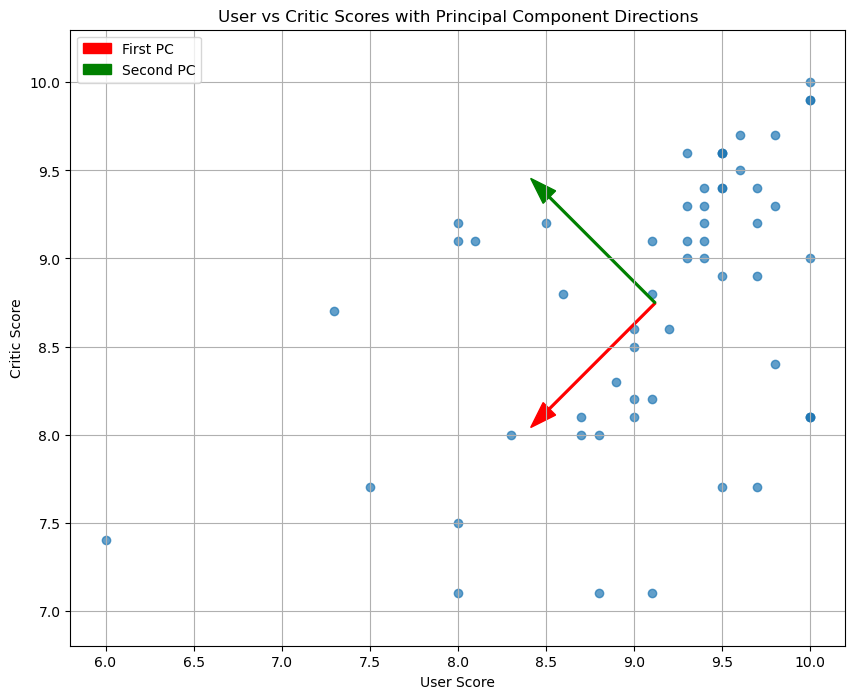

In [54]:
# Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(data['user_score'], data['critic_score'], alpha=0.7)

# Plotting the first principal component
plt.arrow(np.mean(data['user_score']), np.mean(data['critic_score']),
          arrow_scale * pca1[0], arrow_scale * pca1[1],
          color='r', width=0.01, head_width=0.1,
          length_includes_head=True, label='First PC')

# Plotting the second principal component
plt.arrow(np.mean(data['user_score']), np.mean(data['critic_score']),
          arrow_scale * pca2[0], arrow_scale * pca2[1],
          color='g', width=0.01, head_width=0.1,
          length_includes_head=True, label='Second PC')

plt.xlabel('User Score')
plt.ylabel('Critic Score')
plt.title('User vs Critic Scores with Principal Component Directions')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()